<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Solving-Ordinary-Differential-Equations" data-toc-modified-id="Solving-Ordinary-Differential-Equations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solving Ordinary Differential Equations</a></span><ul class="toc-item"><li><span><a href="#Forward-Euler-Method" data-toc-modified-id="Forward-Euler-Method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Forward Euler Method</a></span><ul class="toc-item"><li><span><a href="#Creating-a-Simple-ODE-Solver" data-toc-modified-id="Creating-a-Simple-ODE-Solver-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Creating a Simple ODE Solver</a></span><ul class="toc-item"><li><span><a href="#Solving-Numerically" data-toc-modified-id="Solving-Numerically-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Solving Numerically</a></span></li></ul></li><li><span><a href="#Extending-the-Solver-to-a-general-ODE" data-toc-modified-id="Extending-the-Solver-to-a-general-ODE-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Extending the Solver to a general ODE</a></span></li><li><span><a href="#Class-Gaming-aka-ODE-solver-implemented-as-a-class" data-toc-modified-id="Class-Gaming-aka-ODE-solver-implemented-as-a-class-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Class Gaming aka ODE solver implemented as a class</a></span></li></ul></li><li><span><a href="#Runge-Kutta-Method" data-toc-modified-id="Runge-Kutta-Method-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Runge-Kutta Method</a></span></li></ul></li><li><span><a href="#Modeling-Infectious-Diseases-:-SIR-Model" data-toc-modified-id="Modeling-Infectious-Diseases-:-SIR-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling Infectious Diseases : SIR Model</a></span><ul class="toc-item"><li><span><a href="#The-RK4-Way" data-toc-modified-id="The-RK4-Way-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The RK4 Way</a></span></li><li><span><a href="#Import-Some-Libraries" data-toc-modified-id="Import-Some-Libraries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import Some Libraries</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Solving Ordinary Differential Equations

*Prepared by: Alva Presbitero*

Ordinary differential equations (ODEs) are widely used in science and engineering, in particular for modeling dynamic processes. While simple ODEs can be solved with analytical methods, non-linear ODEs are generally not possible to solve in this way, and we need to apply numerical methods.

## Forward Euler Method

### Creating a Simple ODE Solver

As an example, consider the very simple ODE

$$
u^{'} = u
$$

This equation has the general solution 

$$
u = C e^{t}
$$

For any constant $C$, it has many solutions! 

Specifying an initial condition 
$$u(0)=u_0$$ 

gives 

$$C=u_{0}$$

Hence, we get the unique solution

$$
u=u_0 e^t
$$


#### Solving Numerically

When solving this equation numerically, we use the formula

$$
u_{n+1} = u_n + \Delta tf(u_n, t_n)
$$

Hence

$$
u_1 = u_0 + \Delta t u_0 \\
u_2 = u_1 + \Delta t u_1 \\
u_3 = u_2 + \Delta t u_2 \\
u_4 = u_3 + ..
$$

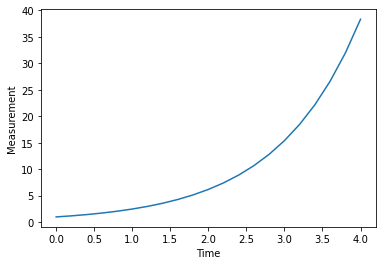

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# step size
dt = 0.2

# some initial condition
U0 = 1

# end of time
T = 4

# calculate steps to end of time
# How many delta ts are there in T?
N = int(T/dt)

# empty containers 
t = np.zeros(N+1)
u = np.zeros(N+1)

# of course we start at time=0
t[0] = 0

# set initial value based from initial condition
u[0] = U0

for n in range(N):
    t[n+1] = t[n] + dt
    u[n+1] = u[n] + dt*u[n]   
    
# plot stuff
plt.plot(t,u)
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.show()

### Extending the Solver to a general ODE

The purpose of the simple examplee previously is to give you a glimpse of how the Forward Euler method works. But we want to build a solver that actually solved general ODEs. In other words, it can be of the following form:

$$
u' = f(u,t)
$$

This requires a slight modification of the code which you'll see below.

In [202]:
def ForwardEuler(f, U0, T, N):
    """
    Solve u’=f(u,t), u(0)=U0, with n steps until t=T.
    """
    # some empty containers
    t = np.zeros(N+1)
    u = np.zeros(N+1) # u[n] is the solution at time t[n]
    
    # initial conditions
    u[0] = U0
    t[0] = 0
    
    # delta t is simply the total T divided by the number of steps
    # step size
    dt = T/N
    
    # for each step
    for n in range(N):
        # adjust time by adding delta
        t[n+1] = t[n] + dt
        
        # populate n by new values c/o the forward euler method
        # only this time, instead of u[n], we have a more general 
        # function called f(u[n], t[n])
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

In [208]:
def f(u, t):
    """
    Returns a general function
    """
    return u

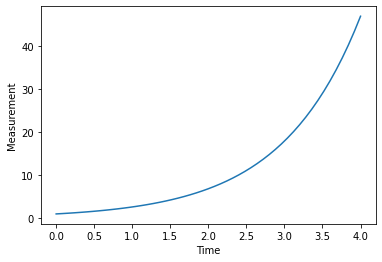

In [209]:
# some initial condition
U0 = 1

# total time
T = 4

# number of time steps
# determines the step size
N = 50

# call the method where f corresponds to your function
u, t = ForwardEuler(f, U0, T, N)

# plot stuff
plt.plot(t,u)
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.show()

### Class Gaming aka ODE solver implemented as a class 

We can increase the flexibility of the ```ForwardEuler``` function by implementing it as sa class.

How will this solver class be implemented?

1. Constructor (```__init```) which takes ```f, T, N,``` and ```U0``` as arguments.
2. Time step $\Delta t$ and sequences $u_n, t_n$ must be initialized and stored as attributes. These tasks are super easy to handle in the constructor.
3. The class needs a ```solve``` method that is very similar to the ```ForwardEuler``` function.


In addition to these methods, it may be convenient to implement the formula for advancing the solution one step as a separate method advance. In this way it becomes very easy to implement new numerical methods, since we typically only need to change the advance method. 

In [211]:
import numpy as np

class ForwardEuler:
    def __init__(self, f, U0, T, N):
        self.f, self.U0, self.T, self.N = f, U0, T, N
        self.dt = T/N
        self.u = np.zeros(self.N + 1)
        self.t = np.zeros(self.N + 1)
        
    def solve(self):
        """Compute solution for 0 <=t<=T."""
        self.u[0] = float(self.U0)
        
        for n in range(self.N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            
            # advance is to be able to modify the function as you please
            self.u[n+1] = self.advance()
        return self.u, self.t
    
    def advance(self):
        """
        Advance the solution one time step.
        """
        
        # create local variables to get rid of self in the numerical formula
        # only for ease of reading
        
        u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
        
        unew = u[n] + dt * f(u[n], t[n])
        return unew

Let's also use a class to handle the right-hand side ```f(u,t)```. For instance, let's have the **logistic growth** (as opposed to the exponential growth in the previous example).

$$
u'(t) = \alpha u(t)(1-\frac{u(t)}{R})
$$
where 
$$
u(0) = U_0 , t \in [0,40]
$$

In [216]:
class Logistic:
    def __init__(self, alpha, R, U0):
        self.alpha, self.R, self.U0 = alpha, float(R), U0
    
    def __call__(self,  u, t): 
        # simply f(u, t)
        return self.alpha * u * (1 - u/self.R)  

Finally

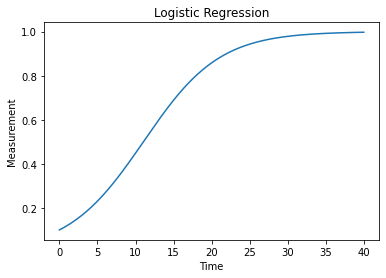

In [217]:
problem = Logistic(0.2, 1, 0.1)
method = ForwardEuler(problem, problem.U0, 40, 401)

u, t = method.solve()

# plot stuff
plt.title("Logistic Regression")
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.plot(t,u)
plt.show()

<div class="alert alert-block alert-info">
<b>Do-It-Yourself Corner</b>
    
Try to create a class for the exponential function.
</div>

## Runge-Kutta Method

The Forward Euler (FE) is not the most sophisticated ODE solver. Many alternative methods exist. One very popular class of ODE solvers is known as the Runge-Kutta methods. The simplest example of a Runge-Kutta (RK) method is in fact the FE method!

$$
u_{n+1} = u_{n} + \Delta t f(u_n, t_n)
$$

This can be rewritten as follows:

$$
k_1 = f(u_n, t_n) \\
u_{n+1} = u_{n} + \Delta t k_1
$$

**Explicit Midpoint**

Although there is not much difference between the two, this is the formulation of the Runge-Kutta methods. The intermediate value $k_1$ is often referred to as a *stage derivative* in the ODE literature.We can proceed with second order, as in:

$$
k_1 = f(u_n, t_n) \\
k_2 = f(u_n + \frac{\Delta t}{2}k_1, t_n+\frac{\Delta t}{2}) \\
u_{n+1} = u_{n} + \Delta t k_2
$$

This method is known as the *explicit midpoint method* or the modified Euler method. 

The first step is identical to that of the FE method, but instead of using the stage derivative $k_1$ to advance the solution to the next step, we use  it to compute a new stage derivative $k_2$, which is an *approximation of the derivative of u at time $t(n) +∆t/2$.* Finally, we use this midpoint derivative to advance the the solution to $t(n+1)$

**RK4**

The most widely known member of the Runge–Kutta family is generally referred to as "RK4", the "classic Runge–Kutta method" or simply as "the Runge–Kutta method".

$$
k_1 = f(u_n, t_n) \\
k_2 = f(u_n + \frac{\Delta t}{2}k_1, t_n+\frac{\Delta t}{2}) \\
k_3 = f(u_n + \frac{\Delta t}{2}k_2, t_n+\frac{\Delta t}{2}) \\
k_4 = f(u_n + \frac{\Delta t}{2}k_3, t_n+\frac{\Delta t}{2}) \\
u_{n+1} = u_{n} + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

*Optional*

The accuracy of the method can be improved by adding more stages. A general RK method with s stages can be written as

$$
u_{n+1} = u_{n} + \Delta t \Sigma^s_{i=1} b_i k_i
$$

where

$$
k_1 = f(u_n, t_n) \\
k_2 = f(u_n + \Delta t(a_{21}k_1), t_n + c_2\Delta t) \\
k_3 = f(u_n + \Delta t(a_{31}k_1 + a_{32}k_2), t_n + c_3\Delta t) \\
. \\
. \\
. \\
k_s = f(u_n + \Delta t(a_{s1}k_1 + a_{s2}k_2) + ... + a_{s, s-1}k_{s-1}, t_n + c_s\Delta t)
$$

where $s$ is the number of stages, coefficients $a_{i,j} (1 \le j < i \le s), b_i (i=1,2,...,s)$ and $c_i (i=2,3,...,s)$. The matrix $[a_{ij}]$ is called the Runge–Kutta matrix, while the $b_i$ and $c_i$ are known as the weights and the nodes. These data are usually arranged in a mnemonic device, known as a Butcher tableau (after John C. Butcher).

In [142]:
import numpy as np

class ODESolver:
    def __init__(self, f):
        self.f = f
        
    def advance(self):
        """Advance solution one time step."""
        raise NotImplementedError # implement in subclass
        
    def set_initial_condition(self, U0):
        self.U0 = float(U0)
    
    def solve(self, time_points):
        self.t = np.asarray(time_points)
        N = len(self.t)
        self.u = np.zeros(N)
        
        # Assume that self.t[0] corresponds to self.U0
        self.u[0] = self.U0
        
        # Time loop
        for n in range(N-1):
            self.n = n
            self.u[n+1] = self.advance()
        return self.u, self.t

In [218]:
class ForwardEuler(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        unew = u[n] + dt*f(u[n], t[n])
        return unew
        
        
class ExplicitMidpoint(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        dt2 = dt/2.0
        k1 = f(u[n], t)
        k2 = f(u[n] + dt2*k1, t[n] + dt2)
        unew = u[n] + dt*k2
        return unew

class RungeKutta4(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        dt2 = dt/2.0
        k1 = f(u[n], t)
        k2 = f(u[n] + dt2*k1, t[n] + dt2)
        k3 = f(u[n] + dt2*k2, t[n] + dt2)
        k4 = f(u[n] + dt*k3, t[n] + dt)
        unew = u[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        return unew

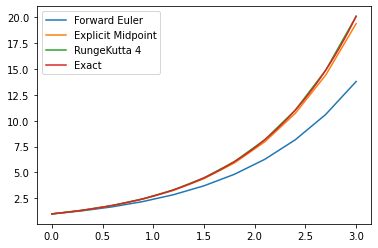

In [219]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, t):
    return u

time_points = np.linspace(0, 3, 11)

fe = ForwardEuler(f)
fe.set_initial_condition(U0=1)
u1, t1 = fe.solve(time_points)
plt.plot(t1, u1, label="Forward Euler")

em = ExplicitMidpoint(f)
em.set_initial_condition(U0=1)
u2, t2 = em.solve(time_points)
plt.plot(t2, u2, label="Explicit Midpoint")

rk4 = RungeKutta4(f)
rk4.set_initial_condition(U0=1)
u3, t3 = rk4.solve(time_points)
plt.plot(t3, u3, label="RungeKutta 4")

#plot the exact solution in the same plot
time_exact = np.linspace(0,3,301) #more points to improve the plot
plt.plot(time_exact,np.exp(time_exact),label="Exact")
plt.legend()
plt.show()

# Modeling Infectious Diseases : SIR Model
A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, t:

1. S(t) are those susceptible but not yet infected with the disease;
2. I(t) is the number of infectious individuals;
3. R(t) are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$. 

$\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $\frac{S}{N}$). 

$\gamma$ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$$
S'(t) = -\beta \frac{SI}{N} \\
I'(t) = \beta \frac{SI}{N} - \gamma I \\
R'(t) = \gamma I
$$

where $N$ is the total population and $N = S + I + R$. 

## The RK4 Way

But first, how do we transition our ```ODESolver``` for system of ODEs?

Given array ```t```

```
t = [0. 0.4 0.8 1.2 (...) ]
```

For scalar ODE, the array ```u``` may look as follows:

```
u = [ 1.0 1.4 1.96 2.744 (...)]
u[0] = 1.0
u[1] = 1.4
(...)
```

In the case of a system of two ODEs, ```t``` is still a one-dimensional array, but the solution array ```u``` is now two-dimensional, with **one column for each solution component**. Indexing into it yields one-dimensional arrays of length two, which are the two solution components at each time step:
```
u = [[1.0 0.8][1.4 1.1] [1.9 2.7] (...)]
u[0] = [1.0 0.8]
u[1] = [1.4 1.1]
(...)
```


1. Ensure that ```f(u,t)``` always returns an array.
2. Inspect ```U0``` to see if it is a single number or a list/array/tuple and make the u either a one-dimensional or two-dimensional array

In [220]:
class ODESolver:
    def __init__(self, f): 
        # Wrap user’s f in a new function that always
        # converts list/tuple to array (or let array be array)
        self.f = lambda u, t: np.asarray(f(u, t), float)
        
    def set_initial_condition(self, U0):
        if isinstance(U0, (float,int)):    # scalar ODE
            self.neq = 1                   # no of equations
            self.U0 = float(U0)
        else: # system of ODEs
            U0 = np.asarray(U0)
            self.neq = U0.size # no of equations
            self.U0 = U0
            
    def solve(self, time_points):
        self.t = np.asarray(time_points)
        N = len(self.t)

        if self.neq == 1: # scalar ODEs
            self.u = np.zeros(N)
        
        else: # systems of ODEs
            self.u = np.zeros((N,self.neq))
            
        # Assume that self.t[0] corresponds to self.U0
        self.u[0] = self.U0
        
        # Time loop
        for n in range(N-1):
            self.n = n
            self.u[n+1] = self.advance()
        return self.u, self.t

In [221]:
class RungeKutta4(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        dt2 = dt/2.0
        k1 = f(u[n], t)
        k2 = f(u[n] + dt2*k1, t[n] + dt2)
        k3 = f(u[n] + dt2*k2, t[n] + dt2)
        k4 = f(u[n] + dt*k3, t[n] + dt)
        unew = u[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        return unew

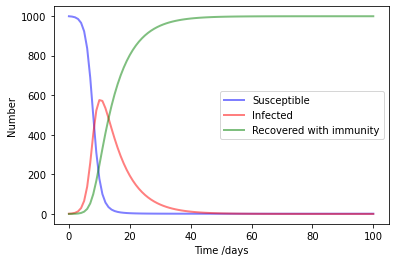

In [224]:
import numpy as np
import matplotlib.pyplot as plt


beta = 1.0
gamma = 1/7.0

def SIR_model(u,t):    
    S, I, R = u[0], u[1], u[2]
    N = S + I + R
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma * I
    dR = gamma * I
    return [dS,dI,dR]

S0 = 999
I0 = 1
R0 = 0

solver= RungeKutta4(SIR_model)

solver.set_initial_condition([S0,I0,R0])

time_points = np.linspace(0, 100, 101)

u, t = solver.solve(time_points)
S = u[:,0]; I = u[:,1]; R = u[:,2]

plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.legend()
plt.show()

## Import Some Libraries

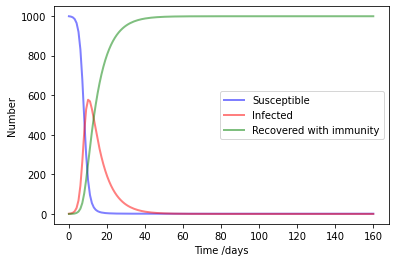

In [223]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1, 1./7 

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))

S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.legend()
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.show()

<div class="alert alert-block alert-info">
<b>Assignment #1</b>
    
Choose a system that you want to model using **Coupled Ordinary Differential Equations**. It may or may not be already discussed in class. 

1. Define all parameters/variables you used.
2. Using preferred parameter values, compare results for Euler, RK4 and an any ODE solver library.
3. Explore varying the different parameters.
4. Write your key takeaways.
</div>

# References
1. https://sundnes.github.io/solving_odes_in_python/ode_book.pdf
2. https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/